### Test Code for Module SVM

In [1]:
include("./script.jl")
import .SVM

In [2]:
import Plots
import Random

In [3]:
include("../tools.jl")
import .JuTools

In [4]:
X_data, Y_data = JuTools.data_generate_cluster_2d(pos1=(20.0, 20.0), pos2=(50.0, 50.0),
    radius1=5.0, radius2=5.0, random_scale=8.0, data_size=1000)
Y_data .= Y_data .* 2.0 .- 1.0
println(size(X_data))
println(size(Y_data))

(1000, 2)
(1000,)


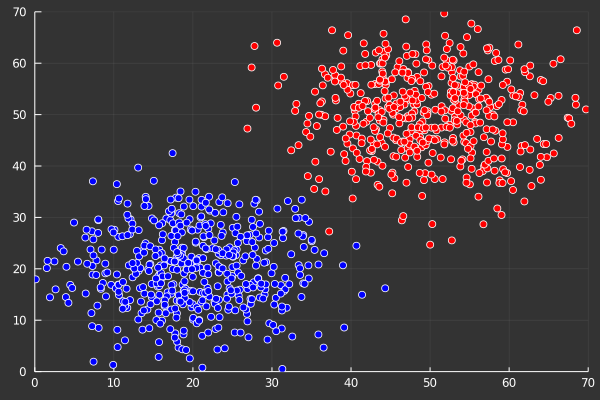

In [5]:
# plot the data
plot_X1 = [X_data[i, 1] for i in 1:(size(X_data)[1]) if Y_data[i] == -1.0]
plot_Y1 = [X_data[i, 2] for i in 1:(size(X_data)[1]) if Y_data[i] == -1.0]
plot_X2 = [X_data[i, 1] for i in 1:(size(X_data)[1]) if Y_data[i] == 1.0]
plot_Y2 = [X_data[i, 2] for i in 1:(size(X_data)[1]) if Y_data[i] == 1.0]
Plots.gr()
Plots.scatter(plot_X1, plot_Y1, leg=false, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 70.0))
Plots.ylims!((0.0, 70.0))

### Linear SVM

In [6]:
weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.05, max_iter=10, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data))

Accuracy: 0.499


In [7]:
weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.05, max_iter=100, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data))

Accuracy: 0.499


In [8]:
weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.05, max_iter=1000, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data))

Accuracy: 0.508


In [9]:
weights = SVM.train_linear(X_data, Y_data, 1.0, learning_rate=0.05, max_iter=10000, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data, weights), Y_data))

Accuracy: 0.999


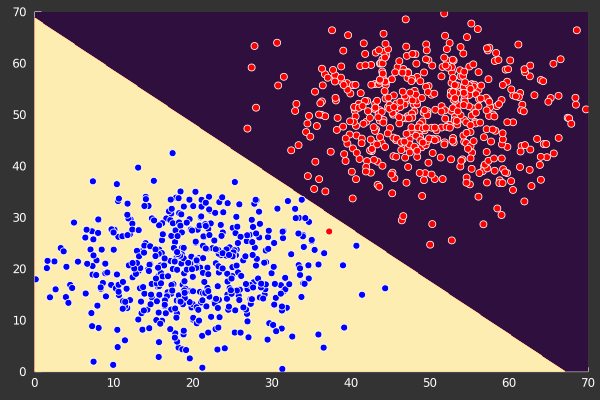

In [10]:
X_test_1 = 0:0.1:70
X_test_2 = 0:0.1:70
f_test1(X1, X2) = begin
   SVM.predict([X1, X2], weights)[1] 
end
Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test1, leg=false, fill=true, c=Plots.cgrad(:matter, rev=true, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 70.0))
Plots.ylims!((0.0, 70.0))

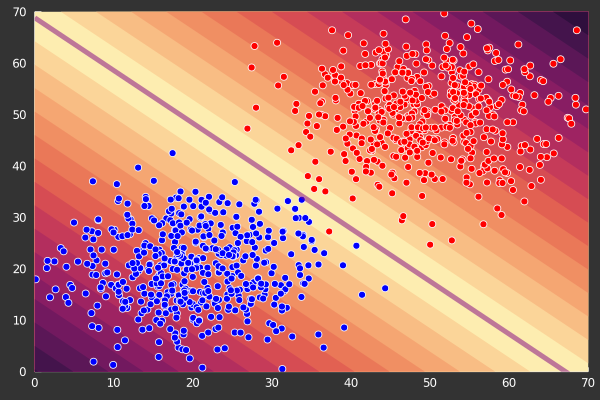

In [11]:
f_test2(X1, X2) = begin
   abs(SVM.predict_proba([X1, X2], weights)[1])
end
Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test2, leg=false, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
plot_X3 = collect(0:70)
plot_Y3 = -(weights.b .+ (weights.w[1] .* plot_X3)) ./ weights.w[2]
Plots.plot!(plot_X3, plot_Y3, c="purple", linewidth=5, alpha=0.5)
Plots.xlims!((0.0, 70.0))
Plots.ylims!((0.0, 70.0))